# distance functions 

## center distance 

In [4]:
%matplotlib inline 
import experiment as ex
import network_generation.generation as ng 
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats

In [6]:
# check position vector
boundary = 's'
kappa = 3
n = 1000
d = 2

RGG = ng.RGGEnsemble(kappa,n,d,boundary)
RGG.generate_samples(n=1)
pos = RGG.samples[0].positions

# plt.plot(pos[:,0],pos[:,1],'o')

# histograms

## center distance

In [7]:
def compute_center_distances(boundary, positions):
    d_list = []
    if boundary == 'g':
        # distance of points from [0,0]
        for pos in positions:
            d = 0 
            for coord in pos:
                d += coord**2
            d_list.append(np.sqrt(d)) 

    else:
        # distance from [0.5,0.5]
        for pos in positions:
            d = 0 
            for coord in pos:
                d += (coord-0.5)**2
            d_list.append(np.sqrt(d)) 
            
    return d_list

In [8]:
# test 

boundary = 'g'
positions = np.ones(20).reshape(10,2)
positions = 0.5*positions
print positions

[[ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.5  0.5]]


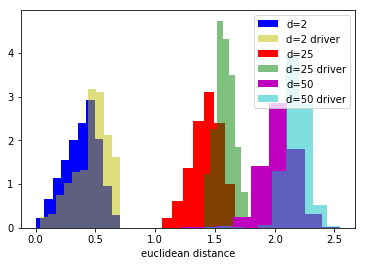

In [111]:
# RGG test 
# expect variance to go down as d goes up ? gets closer to ER? 
kappa = 10
n = 1000
boundary = 's'
num_samples = 100
num_radii = 10 

#####
d = 2

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

distances = []
distancesnD = []
RGG = ng.RGGEnsemble(kappa,n,d, boundary=boundary,num_radii=num_radii)
RGG.generate_samples(n=num_samples)
for s in RGG.samples:
    num_drivers = s.find_num_unmatched()
    distances.extend(compute_center_distances(boundary, s.positions)[:])
    distancesnD.extend(compute_center_distances(boundary, s.positions[s.find_unmatched()])[:])
    
d2 = ax.hist(distances,color='b',label='d=2',normed=1)
d2nD = ax.hist(distancesnD,color='y',label='d=2 driver',normed=1,alpha=0.5)

######
d = 25

RGG = ng.RGGEnsemble(kappa,n,d, boundary=boundary,num_radii=num_radii)
RGG.generate_samples(n=num_samples)
distance = []
distancesnD = []
for s in RGG.samples:
    distances = compute_center_distances(boundary, s.positions)
    distancesnD = compute_center_distances(boundary, s.positions[s.find_unmatched()])
    
d25 = ax.hist(distances,color='r',label='d=25',normed=1)
d25nD = ax.hist(distancesnD,color='g',label='d=25 driver',normed=1,alpha=0.5)

######

d = 50

RGG = ng.RGGEnsemble(kappa,n,d, boundary=boundary,num_radii=num_radii)
RGG.generate_samples(n=num_samples)
for s in RGG.samples:
    distances.extend(compute_center_distances(boundary, s.positions))
    distancesnD.extend(compute_center_distances(boundary, s.positions[s.find_unmatched()]))

d50 = ax.hist(distances,color='m',label='d=50',normed=1)
d50nD = ax.hist(distancesnD,color='c',label='d=50 driver',normed=1,alpha=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels)
ax.set_xlabel('euclidean center distance')

- is this correct to compare the histograms, by norming them? need to make sure that this makes sense 

- write into a function and compute the difference in mean, and the CV (with error bars)

- check how to compare the means and standard deviations of the distance distributions... is there an error on the standard deviation? 

# node-node distance  

In [9]:
# compute distance between all points, first one to all others 
# use periodic conditions? -- no

def compute_distances(positions):

    positions = np.array(positions)
    n, dim = positions.shape

    d_list = []
    
    # dont do distance 0 <--> 0
    for i in xrange(1,n) :
        dij = 0
        #Loop over number of dimensions
        for k in xrange(dim):
            # Compute the absolute distance
            dist = abs( positions[0, k] - positions[i, k] )**2
            dij = dij + dist         
        d_list.append(dij**0.5)
        
    return d_list

In [10]:
def compute_CV(data):
    
    n = float(len(data))
    
    # compute nth sample moment
    mu4 = stats.moment(data,moment=4)
    mu2 =  stats.moment(data,moment=2)
    var = np.var(data)

    # the fourth population moment estimator 
    D4 = ((n-1)/(n**3))*((n**2 - 3*n + 3)*mu4 + 3*(2*n - 3)*(mu2**2))

    # the estimate of the variance standard error 
    Var_SE = np.sqrt((1/(n))*(D4 - ((n-3)/(n-1))*(var**2)))
    
    # normal approximation 
    # Var_SEn = np.var(data)*np.sqrt(2/((float(n))-1))

    CV = ( np.var(data)**0.5 ) / ( np.mean(data) ) 

    part1 = (Var_SE/(  2.0*(np.var(data)**0.5)*np.mean(data) ) )**2 
    part2 = (  (  ((np.var(data))**0.5)*stats.sem(data)/(np.mean(data)**2)  )  )**2
    CV_SE = np.sqrt( part1  +  part2 )  

    return CV, CV_SE   

CV = 0.00150431762676
CV = 0.000613627972228
CV = 0.000264439469945


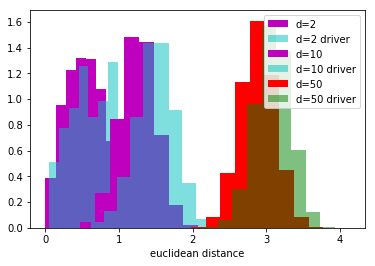

In [192]:
kappa = 10
n = 1000
boundary = 's'
num_samples = 100
num_radii = 10 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

d = 2
distances = []
distancesnD = []
RGG = ng.RGGEnsemble(kappa,n,d, boundary=boundary,num_radii=num_radii)
RGG.generate_samples(n=num_samples)
for s in RGG.samples:
    num_drivers = s.find_num_unmatched()
    distances.extend(compute_distances(s.positions)[:])
    distancesnD.extend(compute_distances(s.positions[s.find_unmatched()])[:])
d2 = ax.hist(distances,color='m',label='d='+str(d),normed=1)
d2nD = ax.hist(distancesnD,color='c',label='d='+str(d)+' driver',normed=1,alpha=0.5)
mean = np.mean(distances)
std = stats.sem(distances)

print 'CV = ' + str(std/mean)

del RGG

d = 10
distances = []
distancesnD = []
RGG = ng.RGGEnsemble(kappa,n,d, boundary=boundary,num_radii=num_radii)
RGG.generate_samples(n=num_samples)
for s in RGG.samples:
    num_drivers = s.find_num_unmatched()
    distances.extend(compute_distances(s.positions)[:])
    distancesnD.extend(compute_distances(s.positions[s.find_unmatched()])[:])
d2 = ax.hist(distances,color='m',label='d='+str(d),normed=1)
d2nD = ax.hist(distancesnD,color='c',label='d='+str(d)+' driver',normed=1,alpha=0.5)
mean = np.mean(distances)
std = stats.sem(distances)

print 'CV = ' + str(std/mean)

del RGG

d = 50
distances = []
distancesnD = []
RGG = ng.RGGEnsemble(kappa,n,d, boundary=boundary,num_radii=num_radii)
RGG.generate_samples(n=num_samples)
for s in RGG.samples:
    num_drivers = s.find_num_unmatched()
    distances.extend(compute_distances(s.positions)[:])
    distancesnD.extend(compute_distances(s.positions[s.find_unmatched()])[:])
d50 = ax.hist(distances,color='r',label='d='+str(d),normed=1)
d50nD = ax.hist(distancesnD,color='g',label='d='+str(d)+' driver',normed=1,alpha=0.5)
mean = np.mean(distances)
std = stats.sem(distances)

print 'CV = ' + str(std/mean)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels)
ax.set_xlabel('euclidean distance')

we want to track the dispersion of the distance functions over dimension, as this is our guess at the trend

so we can use the coefficient of variation to track the dispersion of the distances 

# why are periodic less difficult to control than ER graphs? 

In [17]:
kappa = [10]
n = 1000
boundary = 'p'
num_samples = 100
num_radii = 10 

d_range = [2,3,6,9,15,25]

## mean distance v. dimension

d = 2 finished
d = 3 finished
d = 6 finished
d = 9 finished
d = 15 finished
d = 25 finished


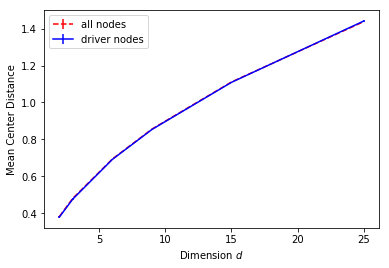

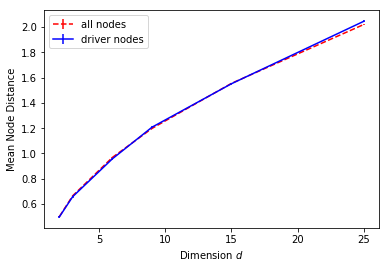

In [39]:
# plot the mean center and node-node distance for all and driver nodes 

centerfig = plt.figure()
centerax = centerfig.add_subplot(1,1,1)
distfig = plt.figure()
distax = distfig.add_subplot(1,1,1)

means = []
cmeans = []
meansnD = []
cmeansnD = []
stds = []
stdsnD = []
cstds = []
cstdsnD = []
for d in d_range:
    distances = []
    distancesnD = []
    cdistances = []
    cdistancesnD = []
    RGG = ex.RGGExperiment(kappa, n, d, boundary=boundary, num_radii=num_radii)
    for s in RGG.ensembles[0].samples:
        num_drivers = s.find_num_unmatched()
        distances.extend(compute_distances(s.positions)[:])
        distancesnD.extend(compute_distances(s.positions[s.find_unmatched()])[:])
        cdistances.extend(compute_center_distances(boundary, s.positions)[:])
        cdistancesnD.extend(compute_center_distances(boundary, s.positions[s.find_unmatched()])[:])
    means.append(np.mean(distances))
    meansnD.append(np.mean(distancesnD))
    cmeans.append(np.mean(cdistances))
    cmeansnD.append(np.mean(cdistancesnD))
    stds.append(stats.sem(distances))
    stdsnD.append(stats.sem(distancesnD))
    cstds.append(stats.sem(cdistances))
    cstdsnD.append(stats.sem(cdistancesnD))
    print 'd = ' + str(d) + ' finished'
    
distax.errorbar(d_range, means, yerr=stds, fmt='r--', label='all nodes')
distax.errorbar(d_range, meansnD, yerr=stdsnD, fmt='b', label = 'driver nodes')
handles, labels = distax.get_legend_handles_labels()
distax.legend(handles,labels)
distax.set_xlabel('Dimension $d$')
distax.set_ylabel('Mean Node Distance')

centerax.errorbar(d_range, cmeans, yerr=cstds, fmt='r--', label='all nodes')
centerax.errorbar(d_range, cmeansnD, yerr=cstdsnD, fmt='b', label = 'driver nodes')
handles, labels = centerax.get_legend_handles_labels()
centerax.legend(handles,labels)
centerax.set_xlabel('Dimension $d$')
centerax.set_ylabel('Mean Center Distance')

###

centerfig.savefig('./plots/center_periodic_mean_' + str(n) + '.eps')
distfig.savefig('./plots/distance_periodic_mean_' + str(n) + '.eps') 

## distance CV v. dimension

d = 2 finished
d = 3 finished
d = 6 finished
d = 9 finished
d = 15 finished
d = 25 finished


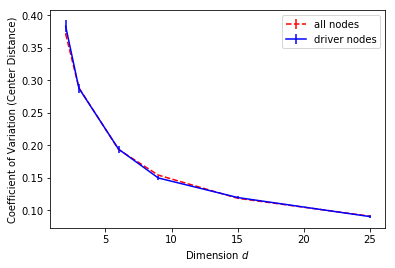

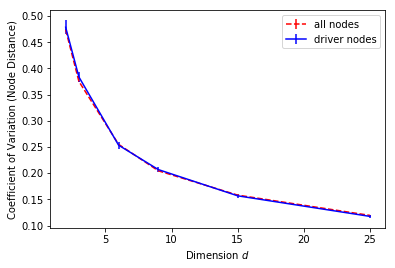

In [18]:
# compute center and node-node distance and plot coefficient of variation 
# over dimension for different 

centerfig = plt.figure()
centerax = centerfig.add_subplot(1,1,1)
distfig = plt.figure()
distax = distfig.add_subplot(1,1,1)

CVs = []
CVsnD = []
cCVs = []
cCVsnD = []
CV_SEs = []
CV_SEsnD = []
cCV_SEs = []
cCV_SEsnD = []

for d in d_range:
    distances = []
    distancesnD = []
    cdistances = []
    cdistancesnD = []
    RGG = ex.RGGExperiment(kappa, n, d, boundary=boundary, num_radii=num_radii)
    
    # compute distance lists 
    for s in RGG.ensembles[0].samples:
        num_drivers = s.find_num_unmatched()
        distances.extend(compute_distances(s.positions)[:])
        distancesnD.extend(compute_distances(s.positions[s.find_unmatched()])[:])
        cdistances.extend(compute_center_distances(boundary, s.positions)[:])
        cdistancesnD.extend(compute_center_distances(boundary, s.positions[s.find_unmatched()])[:])
    
    # create CV and CV error lists 
    c,s = compute_CV(distances)    
    CVs.append(c)
    CV_SEs.append(s)
    
    c,s = compute_CV(distancesnD)    
    CVsnD.append(c)
    CV_SEsnD.append(s)

    c,s = compute_CV(cdistances)    
    cCVs.append(c)
    cCV_SEs.append(s)

    c,s = compute_CV(cdistancesnD)    
    cCVsnD.append(c)
    cCV_SEsnD.append(s)

    print 'd = ' + str(d) + ' finished'
    
distax.errorbar(d_range, CVs, yerr=CV_SEs, fmt='r--', label='all nodes')
distax.errorbar(d_range, CVsnD, yerr=CV_SEsnD, fmt='b', label = 'driver nodes')
handles, labels = distax.get_legend_handles_labels()
distax.legend(handles,labels)
distax.set_xlabel('Dimension $d$')
distax.set_ylabel('Coefficient of Variation (Node Distance)')

centerax.errorbar(d_range, cCVs, yerr=cCV_SEs, fmt='r--', label='all nodes')
centerax.errorbar(d_range, cCVsnD, yerr=cCV_SEsnD, fmt='b', label = 'driver nodes')
handles, labels = centerax.get_legend_handles_labels()
centerax.legend(handles,labels)
centerax.set_xlabel('Dimension $d$')
centerax.set_ylabel('Coefficient of Variation (Center Distance)')

###

centerfig.savefig('./plots/center_periodic_CV_' + str(n) + '.eps')
distfig.savefig('./plots/distance_periodic_CV_' + str(n) + '.eps') 

# why are solid RGGs more difficult to control than ER graphs? 

In [20]:
kappa = [10]
n = 1000
boundary = 's'
num_samples = 100
num_radii = 10 

d_range = [2,3,6,9,15,25]

d = 2 finished
d = 3 finished
d = 6 finished
d = 9 finished
d = 15 finished
d = 25 finished


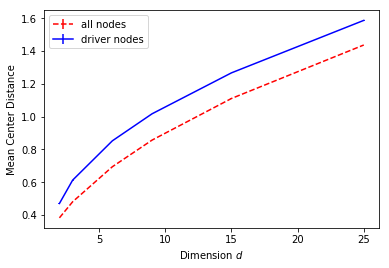

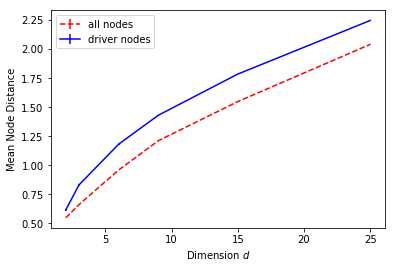

In [42]:
# plot the mean center and node-node distance for all and driver nodes 

centerfig = plt.figure()
centerax = centerfig.add_subplot(1,1,1)
distfig = plt.figure()
distax = distfig.add_subplot(1,1,1)

means = []
cmeans = []
meansnD = []
cmeansnD = []
stds = []
stdsnD = []
cstds = []
cstdsnD = []
for d in d_range:
    distances = []
    distancesnD = []
    cdistances = []
    cdistancesnD = []
    RGG = ex.RGGExperiment(kappa, n, d, boundary=boundary, num_radii=num_radii)
    for s in RGG.ensembles[0].samples:
        num_drivers = s.find_num_unmatched()
        distances.extend(compute_distances(s.positions)[:])
        distancesnD.extend(compute_distances(s.positions[s.find_unmatched()])[:])
        cdistances.extend(compute_center_distances(boundary, s.positions)[:])
        cdistancesnD.extend(compute_center_distances(boundary, s.positions[s.find_unmatched()])[:])
    means.append(np.mean(distances))
    meansnD.append(np.mean(distancesnD))
    cmeans.append(np.mean(cdistances))
    cmeansnD.append(np.mean(cdistancesnD))
    stds.append(stats.sem(distances))
    stdsnD.append(stats.sem(distancesnD))
    cstds.append(stats.sem(cdistances))
    cstdsnD.append(stats.sem(cdistancesnD))
    print 'd = ' + str(d) + ' finished'
    
distax.errorbar(d_range, means, yerr=stds, fmt='r--', label='all nodes')
distax.errorbar(d_range, meansnD, yerr=stdsnD, fmt='b', label = 'driver nodes')
handles, labels = distax.get_legend_handles_labels()
distax.legend(handles,labels)
distax.set_xlabel('Dimension $d$')
distax.set_ylabel('Mean Node Distance')

centerax.errorbar(d_range, cmeans, yerr=cstds, fmt='r--', label='all nodes')
centerax.errorbar(d_range, cmeansnD, yerr=cstdsnD, fmt='b', label = 'driver nodes')
handles, labels = centerax.get_legend_handles_labels()
centerax.legend(handles,labels)
centerax.set_xlabel('Dimension $d$')
centerax.set_ylabel('Mean Center Distance')

###

centerfig.savefig('./plots/center_solid_mean_' + str(n) + '.eps')
distfig.savefig('./plots/distance_solid_mean_' + str(n) + '.eps') 

d = 2 finished
d = 3 finished
d = 6 finished
d = 9 finished
d = 15 finished
d = 25 finished


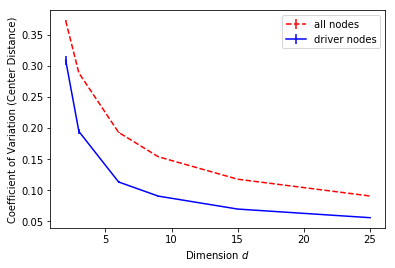

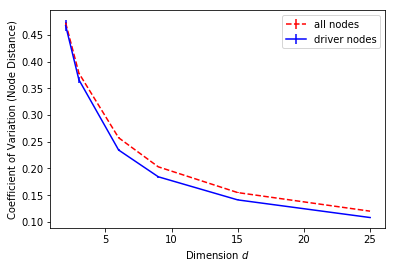

In [21]:
# compute center and node-node distance and plot coefficient of variation 
# over dimension for different 

centerfig = plt.figure()
centerax = centerfig.add_subplot(1,1,1)
distfig = plt.figure()
distax = distfig.add_subplot(1,1,1)

CVs = []
CVsnD = []
cCVs = []
cCVsnD = []
CV_SEs = []
CV_SEsnD = []
cCV_SEs = []
cCV_SEsnD = []

for d in d_range:
    distances = []
    distancesnD = []
    cdistances = []
    cdistancesnD = []
    RGG = ex.RGGExperiment(kappa, n, d, boundary=boundary, num_radii=num_radii)
    for s in RGG.ensembles[0].samples:
        num_drivers = s.find_num_unmatched()
        distances.extend(compute_distances(s.positions)[:])
        distancesnD.extend(compute_distances(s.positions[s.find_unmatched()])[:])
        cdistances.extend(compute_center_distances(boundary, s.positions)[:])
        cdistancesnD.extend(compute_center_distances(boundary, s.positions[s.find_unmatched()])[:])

    # create CV and CV error lists 
    c,s = compute_CV(distances)    
    CVs.append(c)
    CV_SEs.append(s)
    
    c,s = compute_CV(distancesnD)    
    CVsnD.append(c)
    CV_SEsnD.append(s)

    c,s = compute_CV(cdistances)    
    cCVs.append(c)
    cCV_SEs.append(s)

    c,s = compute_CV(cdistancesnD)    
    cCVsnD.append(c)
    cCV_SEsnD.append(s)
        
    print 'd = ' + str(d) + ' finished'
    
distax.errorbar(d_range, CVs, yerr=CV_SEs, fmt='r--', label='all nodes')
distax.errorbar(d_range, CVsnD, yerr=CV_SEsnD, fmt='b', label = 'driver nodes')   
handles, labels = distax.get_legend_handles_labels()
distax.legend(handles,labels)
distax.set_xlabel('Dimension $d$')
distax.set_ylabel('Coefficient of Variation (Node Distance)')

centerax.errorbar(d_range, cCVs, yerr=cCV_SEs, fmt='r--', label='all nodes')
centerax.errorbar(d_range, cCVsnD, yerr=cCV_SEsnD, fmt='b', label = 'driver nodes') 
handles, labels = centerax.get_legend_handles_labels()
centerax.legend(handles,labels)
centerax.set_xlabel('Dimension $d$')
centerax.set_ylabel('Coefficient of Variation (Center Distance)')

###

centerfig.savefig('./plots/center_solid_CV_' + str(n) + '.eps')
distfig.savefig('./plots/distance_solid_CV_' + str(n) + '.eps') 